<a href="https://colab.research.google.com/github/SumayaFathima189/Machine-Learning-Project/blob/Minor_Project/Minor_Project(Sumaya)_Improving_R2_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPROVING R2 SCORE USING outlier detection algorithm**

# Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read Data

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")

## import dataset

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Visualisation

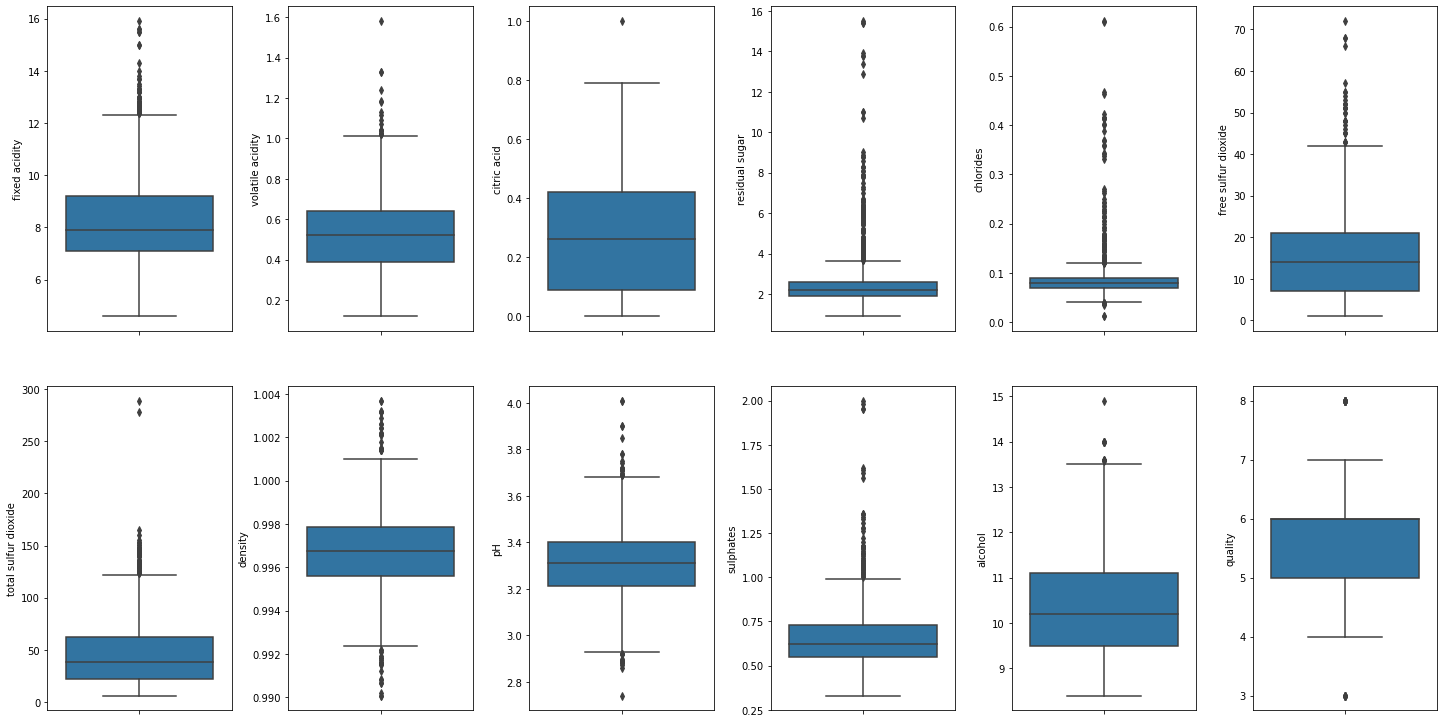

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


## The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [ ]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0             False             False        False  ...      False    False    False
1             False             False        False  ...      False    False    False
2             False             False        False  ...      False    False    False
3             False             False        False  ...      False    False    False
4             False             False        False  ...      False    False    False
...             ...               ...          ...  ...        ...      ...      ...
1594          False             False        False  ...      False    False    False
1595          False             False        False  ...      False    False    False
1596          False             False        False  ...      False    False    False
1597          False             False        False  ...      False    False    False
1598          False             False        False  ...      Fals

TypeError: ignored

In [ ]:

dataset_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

dataset_out.shape

(1179, 12)

In [ ]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA After Removing Outliers

<Figure size 432x432 with 0 Axes>

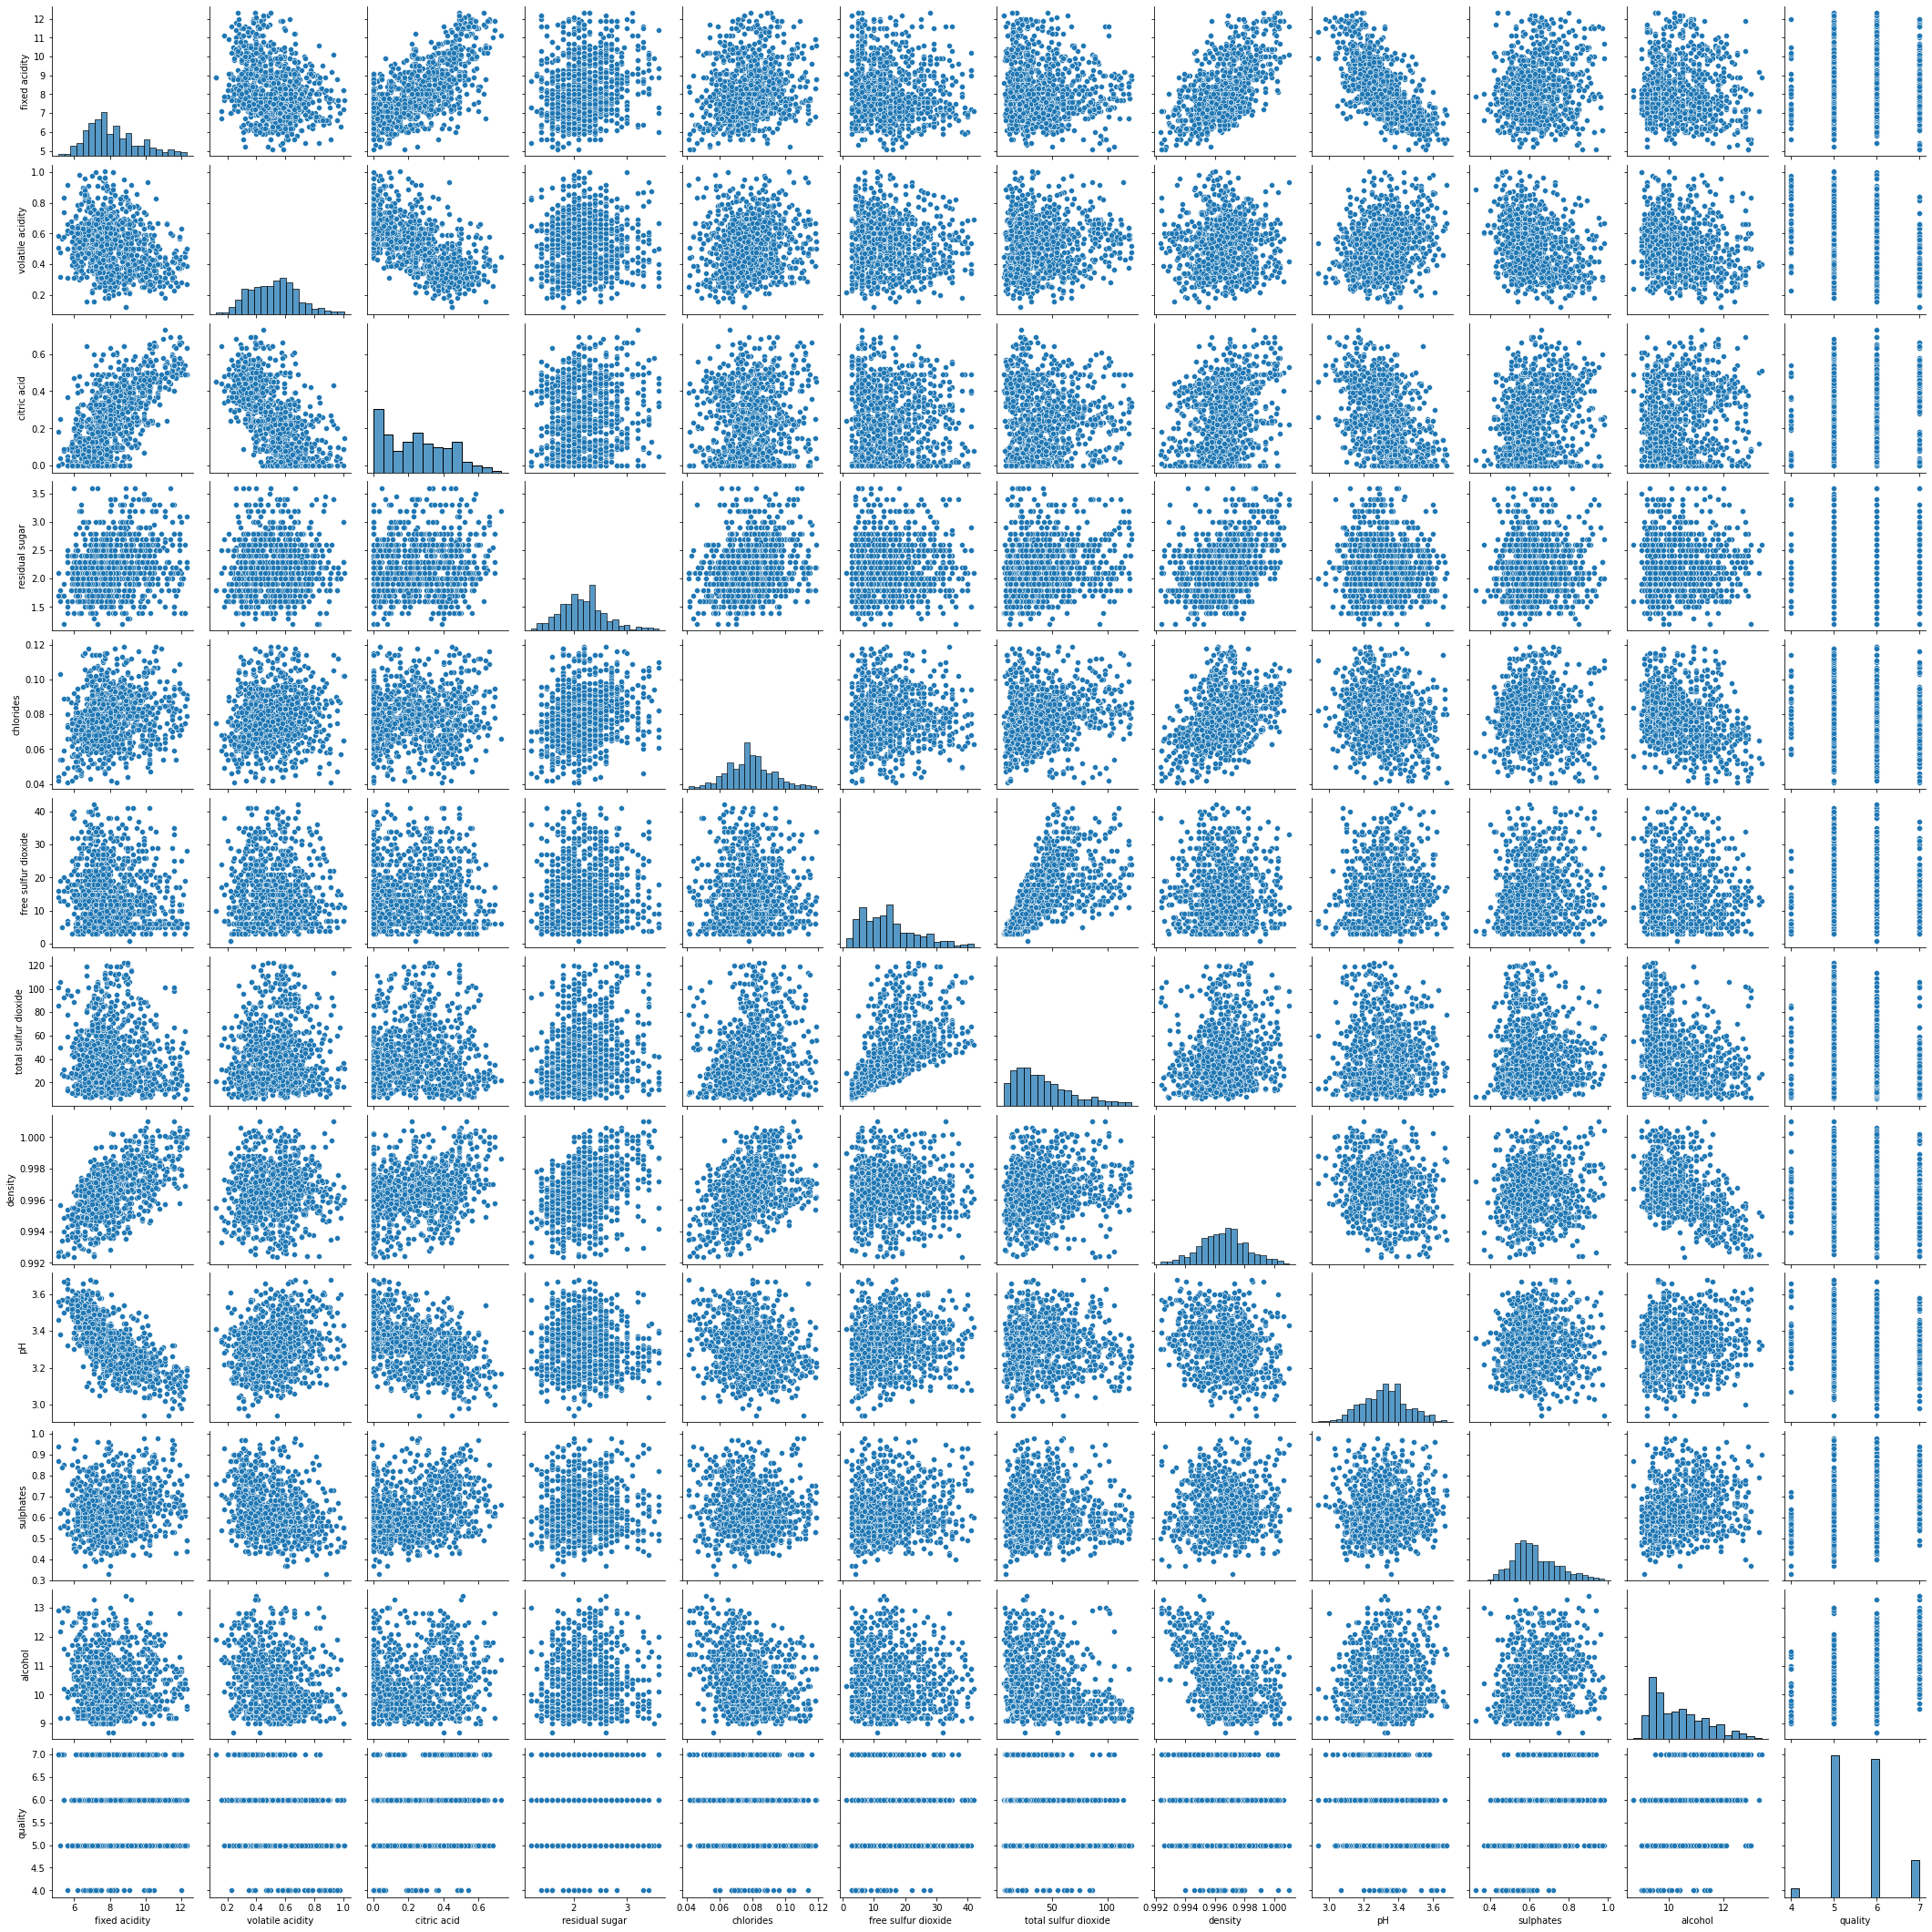

In [ ]:
plt.figure(figsize = (6,6))
sns.pairplot(dataset_out)
plt.show()

# Correlation Matrix

In [ ]:
correlations = dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.113422
volatile acidity       -0.346962
citric acid             0.212133
residual sugar          0.007934
chlorides              -0.190869
free sulfur dioxide    -0.003609
total sulfur dioxide   -0.203374
density                -0.215375
pH                     -0.060288
sulphates               0.413533
alcohol                 0.492551
Name: quality, dtype: float64


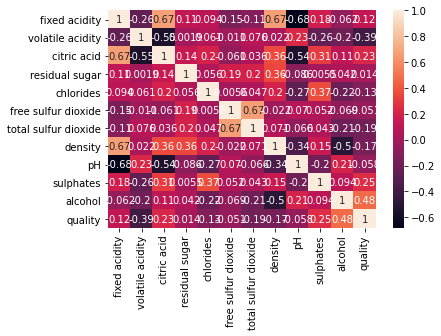

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## impact of various factor on quality

In [ ]:
correlations.sort_values(ascending=False)

alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

In [ ]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [ ]:
features = get_features(0.05)
print(features)
x = dataset_out[features]
y = dataset_out['quality']

## to finding the no of outiers we have in our dataset with properties

[Text(0, 0.5, 'Alcohol '),
 Text(0.5, 0, 'Quality '),
 Text(0.5, 1.0, 'Alcohol %  in different samples')]

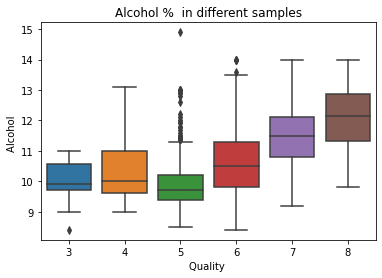

In [ ]:
bx = sns.boxplot(x='quality', y='alcohol', data = df)
bx.set(xlabel='Quality ', ylabel='Alcohol ', title='Alcohol %  in different samples')

[Text(0, 0.5, 'Sulphates '),
 Text(0.5, 0, 'Quality '),
 Text(0.5, 1.0, 'Sulphates %  in different samples')]

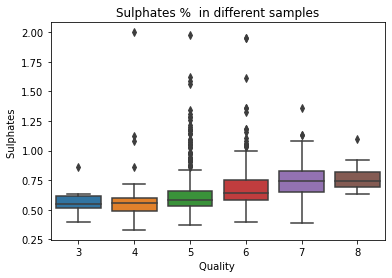

In [ ]:
bx = sns.boxplot(x='quality', y='sulphates', data = df)
bx.set(xlabel='Quality ', ylabel='Sulphates ', title='Sulphates %  in different samples')

[Text(0, 0.5, 'Citric Acid '),
 Text(0.5, 0, 'Quality '),
 Text(0.5, 1.0, 'Citric Acid %  in different samples')]

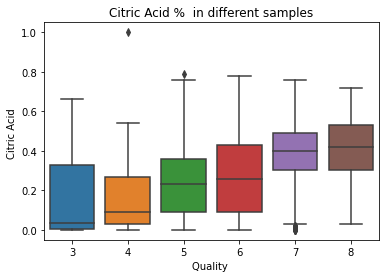

In [ ]:
bx = sns.boxplot(x='quality', y='citric acid', data = df)
bx.set(xlabel='Quality ', ylabel='Citric Acid ', title='Citric Acid %  in different samples')

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Quality'),
 Text(0.5, 1.0, 'Fixed Acidity % in different samples')]

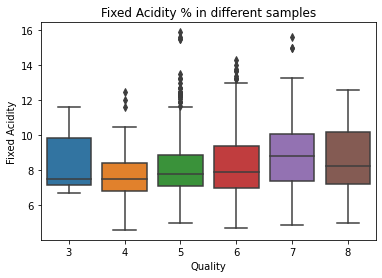

In [ ]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = df)
bx.set(xlabel='Quality', ylabel='Fixed Acidity', title='Fixed Acidity % in different samples')

# Input X and Y

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

# Split The data

In [ ]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.30,random_state=3)


In [ ]:
test_y.shape

(354,)

# Generating the MODEL

In [ ]:
regressor = LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_


27.670573863574454

# Predicting the train and test sets

In [ ]:
train_pred = regressor.predict(train_x)
train_pred

array([6.14356299, 5.11710037, 5.21197237, 5.13828062, 5.97949972,
       5.66562893, 5.4777587 , 5.75868703, 5.98907913, 5.40401462,
       5.52303708, 5.21113234, 5.38046811, 5.75877598, 5.35007708,
       5.08567146, 5.70418446, 6.15016457, 4.98217495, 6.37902248,
       5.34435775, 5.58388766, 5.56975986, 6.5429133 , 5.95905468,
       5.36649122, 5.24598625, 5.58550515, 5.18791293, 5.25072061,
       5.10187748, 5.00442024, 5.69182774, 5.89415555, 5.21543362,
       5.72691046, 5.08042222, 5.16537087, 6.26665775, 5.11379649,
       4.84031354, 5.32908031, 6.59578316, 5.9574155 , 5.17612261,
       5.52155991, 5.08413929, 6.1392644 , 5.48990749, 5.93825753,
       6.23616917, 5.92388793, 5.7786765 , 6.0650639 , 5.79356716,
       5.78930793, 6.0279377 , 4.86136512, 6.06957539, 5.1960625 ,
       5.82623979, 5.21010511, 5.18855806, 5.17190517, 5.06530766,
       5.2522647 , 5.64833165, 5.66231692, 5.54553416, 5.89096209,
       5.29556643, 5.10200981, 5.02472467, 5.47288678, 5.45596

In [ ]:
test_pred = regressor.predict(test_x)
test_pred

array([5.31808602, 5.58846727, 5.83179258, 5.23562426, 6.36492755,
       5.75166188, 5.61511554, 6.51307801, 6.033911  , 5.66126467,
       5.15680921, 5.48432811, 5.53204251, 5.17612261, 5.98484046,
       5.76958525, 6.09867422, 5.24902132, 5.45163284, 5.31035025,
       5.09350311, 5.87828479, 6.40866401, 5.412199  , 5.96442862,
       5.64014045, 5.51992784, 5.13588457, 6.28333602, 5.24519459,
       5.0320614 , 5.27962193, 5.59753018, 5.48395895, 5.58964467,
       6.0845468 , 5.19985585, 6.19604141, 5.34136276, 5.46949893,
       5.52658067, 5.96992765, 5.69237733, 6.52259415, 5.39271847,
       5.25392748, 5.99084808, 5.47407662, 5.49640697, 5.43513813,
       6.32835806, 6.16672701, 6.20060859, 5.78978599, 5.70708754,
       5.27350261, 5.36347142, 5.35513893, 6.26073939, 5.39379095,
       5.13365707, 5.39539395, 5.31604688, 5.55738131, 5.35711922,
       5.41823198, 5.04290802, 5.63751858, 5.05701887, 5.37699259,
       5.4916961 , 6.49050987, 5.67902012, 5.58946844, 5.62497

# Evaluation

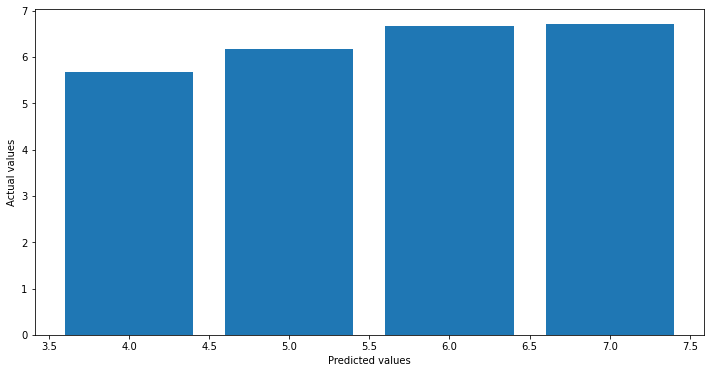

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(test_y,test_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [ ]:
train_rmse = metrics.mean_squared_error(train_pred, train_y) ** 0.5
train_rmse

0.5716073011879286

In [ ]:
test_rmse = metrics.mean_squared_error(test_pred, test_y) ** 0.5
test_rmse

0.5670861234989516

In [ ]:
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 5., 6., 6., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 6.,
       5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 5., 6., 5., 5., 6., 6., 6., 7., 5., 5., 6., 5., 5., 5., 6.,
       6., 6., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 7., 6., 6.,
       5., 6., 6., 6., 6., 6., 5., 6., 7., 6., 5., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 5., 7., 6., 6., 5., 6., 6., 5., 5., 5.,
       5., 5., 7., 7., 5., 6., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6.,
       5., 6., 5., 5., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5., 5., 6., 6.,
       5., 6., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 7., 6., 5., 5., 6., 5., 6.,
       6., 6., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       5., 6., 6., 6., 6.

# ERRORS

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(test_y, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.4566775059053295
Mean Squared Error: 0.3215866714650682
Root Mean Squared Error: 0.5670861234989516


In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y,test_pred)

0.40704840254077124

# Result

In [ ]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527


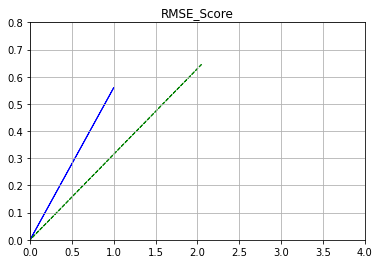

In [ ]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')
plt1.show()

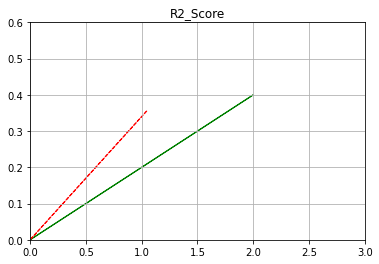

In [ ]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'red'
color2= 'green'
ax.arrow(0,0,2,0.40,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,1,0.34,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_Score')
plt1.show()

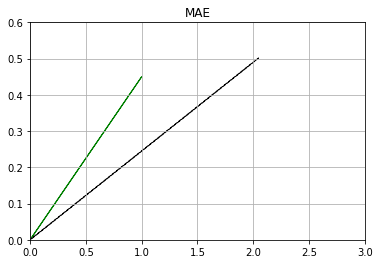

In [ ]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'black'
color2= 'green'
ax.arrow(0,0,1,0.45,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.49,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')
plt1.show()